<a href="https://colab.research.google.com/github/2303a51019/NLP/blob/main/NLP_LAB_O4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer


In [15]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
df = pd.read_csv('/USA_Housing.csv')

# Q1: Display the number of articles per category

In [27]:
print("Count of values in 'Avg. Area Number of Bedrooms' column:")
print(df['Avg. Area Number of Bedrooms'].value_counts().sort_index())
print("\n" + "="*50 + "\n")

Count of values in 'Avg. Area Number of Bedrooms' column:
Avg. Area Number of Bedrooms
2.00    20
2.01    16
2.02    20
2.03    14
2.04    25
        ..
6.46    11
6.47     7
6.48     8
6.49    14
6.50    14
Name: count, Length: 255, dtype: int64




# Q2: Perform basic preprocessing

In [31]:
import re

def preprocess_text(text):
    text = text.lower()
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    # Tokenization and removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

# Apply preprocessing to the 'Address' column (since 'Text' does not exist)
df['cleaned_address'] = df['Address'].apply(preprocess_text)
print("Preview of preprocessed address:")
print(df[['Address', 'cleaned_address']].head())
print("\n" + "="*50 + "\n")

Preview of preprocessed address:
                                             Address  \
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...   
1  188 Johnson Views Suite 079\nLake Kathleen, CA...   
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...   
3                          USS Barnett\nFPO AP 44820   
4                         USNS Raymond\nFPO AE 09386   

                                     cleaned_address  
0   208 michael ferry apt 674 laurabury ne 370105101  
1  188 johnson views suite 079 lake kathleen ca 4...  
2   9127 elizabeth stravenue danieltown wi 064823489  
3                           uss barnett fpo ap 44820  
4                          usns raymond fpo ae 09386  




# Q3: Visualize the most frequent 20 words


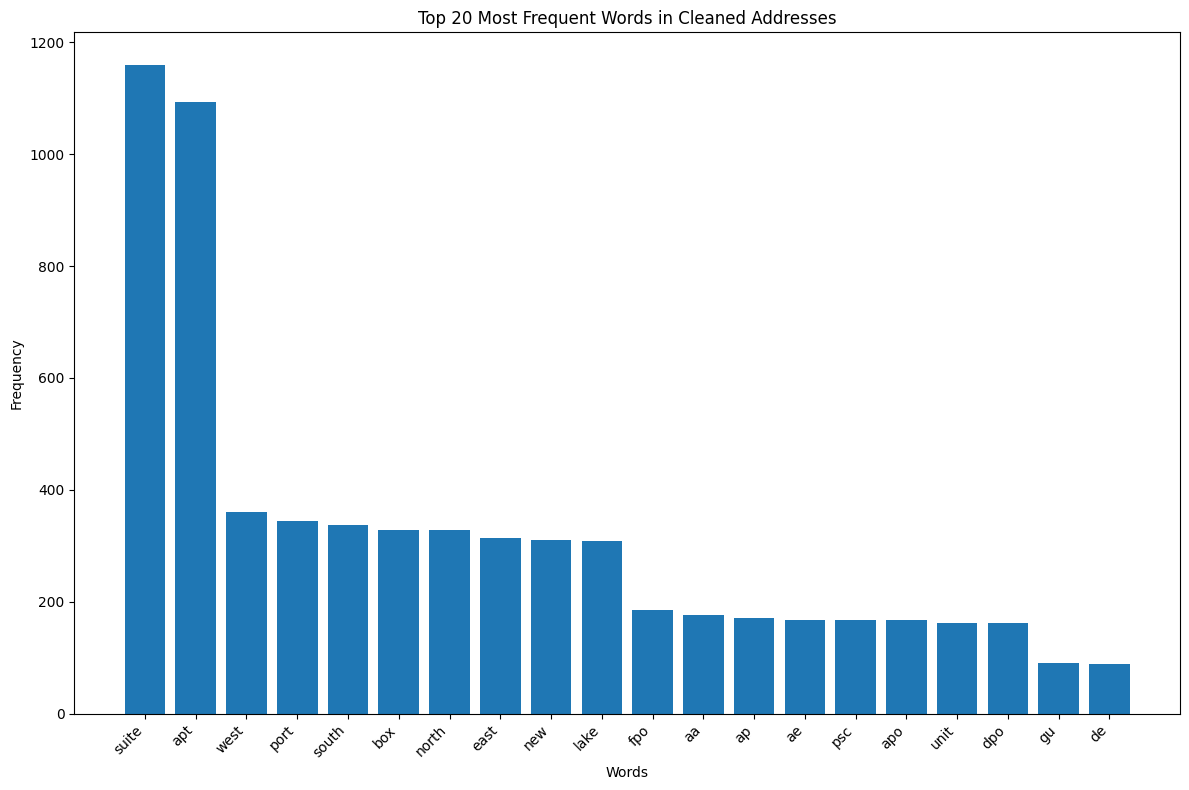

In [34]:
from collections import Counter # Import Counter

all_words = ' '.join(df['cleaned_address']).split() # Changed 'cleaned_text' to 'cleaned_address'
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)
words, counts = zip(*most_common_words)
plt.figure(figsize=(12, 8))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words in Cleaned Addresses') # Updated title
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Q4: Plot a histogram of article lengths

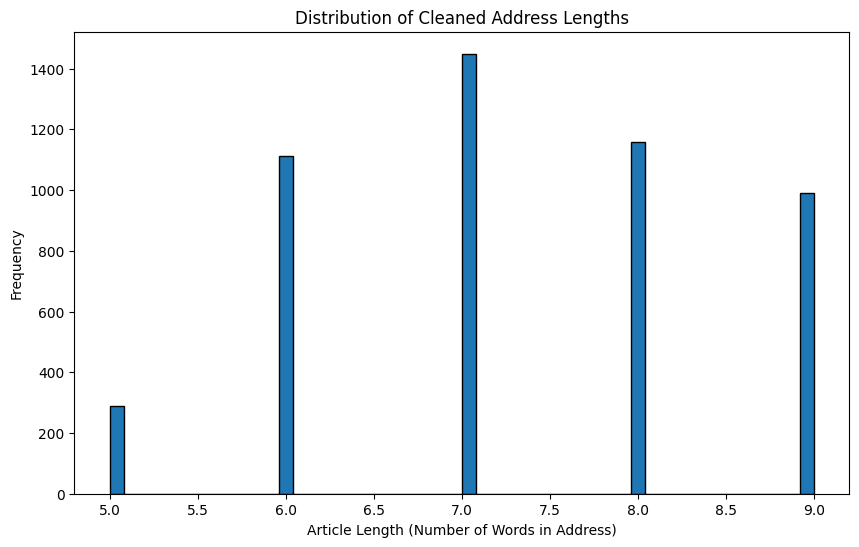

In [36]:
df['article_length'] = df['cleaned_address'].apply(lambda x: len(x.split())) # Changed 'cleaned_text' to 'cleaned_address'
plt.figure(figsize=(10, 6))
plt.hist(df['article_length'], bins=50, edgecolor='black')
plt.xlabel('Article Length (Number of Words in Address)') # Updated label
plt.ylabel('Frequency')
plt.title('Distribution of Cleaned Address Lengths') # Updated title
plt.show()

# Q5: Use CountVectorizer

In [38]:
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(df['cleaned_address'])
print("Shape of the BoW feature matrix:", bow_features.shape)
print("Number of unique words (features):",
len(vectorizer.get_feature_names_out()))

Shape of the BoW feature matrix: (5000, 13539)
Number of unique words (features): 13539
